In [3]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
def preprocess_date(og_df):
    df = og_df.copy()
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df = df.drop("date", axis=1)
    
    return df

def normalize_columns_inline(df):
    scaler = MinMaxScaler()
    columns = df.columns
    df[columns] = scaler.fit_transform(df[columns])
    return df


def preprocess_data(og_df):
    return normalize_columns_inline(preprocess_date(og_df))

In [8]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [9]:
X.head()

,date,precipitation,temp_max,temp_min,wind
0,2012-01-01,0.0,12.8,5.0,4.7
1,2012-01-02,10.9,10.6,2.8,4.5
2,2012-01-03,0.8,11.7,7.2,2.3
3,2012-01-04,20.3,12.2,5.6,4.7
4,2012-01-05,1.3,8.9,2.8,6.1


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [11]:
y.describe()

count     1461
unique       5
top       rain
freq       641
Name: weather, dtype: object

<Axes: >

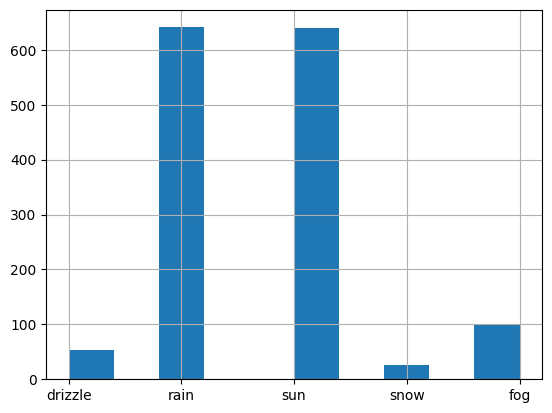

In [12]:
y.hist()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 5), (293, 5), (1168,), (293,))

<Axes: >

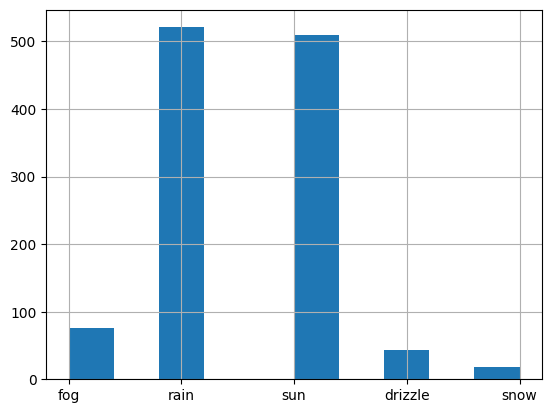

In [15]:
y_train.hist()

In [16]:
X_train = preprocess_data(X_train)

In [17]:
X_train.head()

,precipitation,temp_max,temp_min,wind,year,month,day
1066,0.000000,0.193548,0.153543,0.630952,0.666667,1.000000,0.033333
638,0.330948,0.416667,0.673228,0.702381,0.333333,0.727273,0.966667
799,0.336315,0.370968,0.519685,0.214286,0.666667,0.181818,0.300000
380,0.000000,0.223118,0.255906,0.226190,0.333333,0.000000,0.466667
303,0.617174,0.446237,0.759843,0.285714,0.000000,0.818182,0.966667


<Axes: >

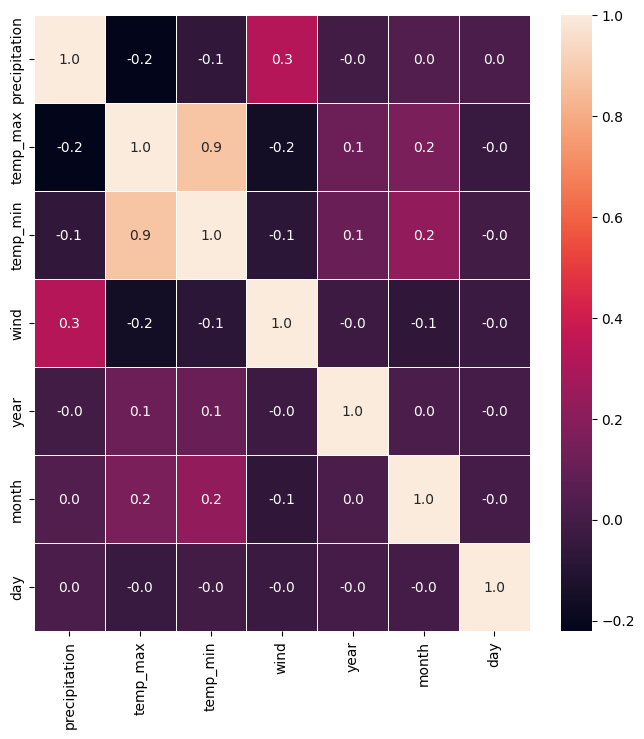

In [18]:
f,ax = plt.subplots(figsize=(8, 8))
sn.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [19]:
def feature_select(og_df):
    return og_df.drop("temp_max", axis=1)

In [20]:
X_train_featsel = feature_select(X_train)

X_train_featsel.head()

,precipitation,temp_min,wind,year,month,day
1066,0.000000,0.153543,0.630952,0.666667,1.000000,0.033333
638,0.330948,0.673228,0.702381,0.333333,0.727273,0.966667
799,0.336315,0.519685,0.214286,0.666667,0.181818,0.300000
380,0.000000,0.255906,0.226190,0.333333,0.000000,0.466667
303,0.617174,0.759843,0.285714,0.000000,0.818182,0.966667


<Axes: >

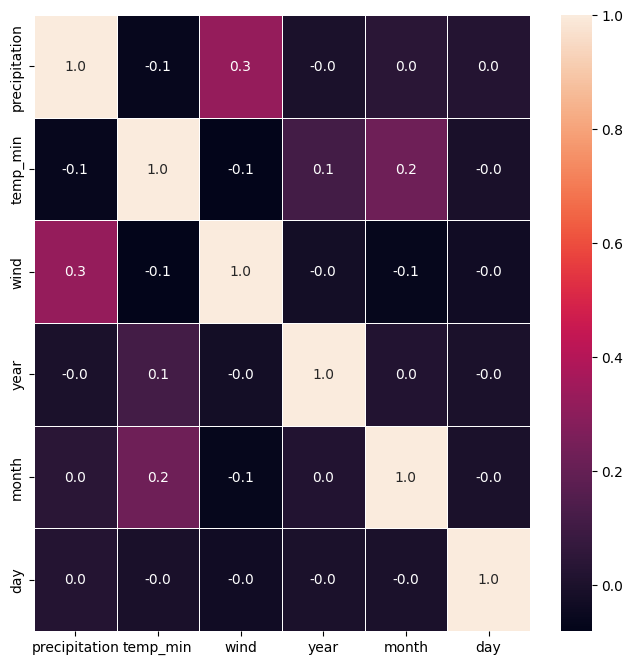

In [21]:
f,ax = plt.subplots(figsize=(8, 8))
sn.heatmap(X_train_featsel.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [22]:
model = GaussianNB()
model.fit(X_train_featsel, y_train)

model2 = GaussianNB()
model2.fit(X_train, y_train)

GaussianNB()

### Train accuracy

In [23]:
y_pred = model.predict(X_train_featsel)

train_accuracy = accuracy_score(y_train, y_pred)

print("GNB (with feature selection) Train accuracy:", train_accuracy * 100, "%")

GNB (with feature selection) Train accuracy: 85.70205479452055 %


In [24]:
y_pred = model2.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred)

print("GNB Train accuracy:", train_accuracy * 100, "%")

GNB Train accuracy: 84.67465753424658 %


### Test accuracy

In [25]:
X_test = preprocess_data(X_test)

In [26]:
X_test_featsel = feature_select(X_test)

In [27]:
X_test.head()

,precipitation,temp_max,temp_min,wind,year,month,day
892,0.000000,0.678899,0.725410,0.244444,0.666667,0.454545,0.333333
1105,0.133641,0.186544,0.520492,0.000000,1.000000,0.000000,0.300000
413,0.000000,0.235474,0.450820,0.322222,0.333333,0.090909,0.533333
522,0.000000,0.764526,0.770492,0.222222,0.333333,0.454545,0.166667
1036,0.041475,0.354740,0.565574,0.266667,0.666667,0.909091,0.033333


In [28]:
X_test_featsel.head()

,precipitation,temp_min,wind,year,month,day
892,0.000000,0.725410,0.244444,0.666667,0.454545,0.333333
1105,0.133641,0.520492,0.000000,1.000000,0.000000,0.300000
413,0.000000,0.450820,0.322222,0.333333,0.090909,0.533333
522,0.000000,0.770492,0.222222,0.333333,0.454545,0.166667
1036,0.041475,0.565574,0.266667,0.666667,0.909091,0.033333


In [29]:
y_pred = model.predict(X_test_featsel)

test_accuracy = accuracy_score(y_test, y_pred)

print("Test accuracy (with feature selection):", test_accuracy * 100, "%")

Test accuracy (with feature selection): 83.61774744027304 %


In [30]:
y_pred = model2.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

print("Test accuracy:", test_accuracy * 100, "%")

Test accuracy: 82.93515358361775 %
